In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

Загрузка и знакомство с данными

In [53]:
df = pd.read_csv('../data/dataset.csv', sep=';')

In [54]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [55]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Очистка данных

In [57]:
df = df.drop(["pdays","previous", "poutcome"], axis=1)

In [58]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [59]:
numeric_cols

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [60]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')

In [61]:
for feature in categorical_cols:
    df[feature] = df[feature].astype('category')


In [62]:
df["default"].cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    0
Length: 4521, dtype: int8

In [63]:
df['age'] = df['age'].astype('uint8')
df['balance'] = df['balance'].astype('float32')
df['day'] = df['day'].astype('uint32')
df['duration'] = df['duration'].astype('uint32')
df['campaign'] = df['campaign'].astype('uint32')


In [64]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   uint8   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   float32 
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   uint32  
 10  month      4521 non-null   category
 11  duration   4521 non-null   uint32  
 12  campaign   4521 non-null   uint32  
 13  y          4521 non-null   category
dtypes: category(9), float32(1), uint32(3), uint8(1)
memory usage: 116.6 KB


In [65]:
for cat in categorical_cols:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

job - numer of unique = 12
marital - numer of unique = 3
education - numer of unique = 4
default - numer of unique = 2
housing - numer of unique = 2
loan - numer of unique = 2
contact - numer of unique = 3
month - numer of unique = 12
y - numer of unique = 2


In [66]:
for col in categorical_cols:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in job: job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
Unique categories in marital: marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
Unique categories in education: education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
Unique categories in default: default
no     4445
yes      76
Name: count, dtype: int64
Unique categories in housing: housing
yes    2559
no     1962
Name: count, dtype: int64
Unique categories in loan: loan
no     3830
yes     691
Name: count, dtype: int64
Unique categories in contact: contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
Unique categories in month: month
may    1398
jul     706
aug

In [67]:
#calculating the sum of misssing values 
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Анализ признаков для модели

In [68]:
#box plot for balance across diffrent job types 
import plotly.express as px 
fig=px.box(df,x='job',y='balance',color='job',title='Balance/job types')
fig.update_layout(
     title={
         'y':0.9,
         'x':0.5,
         'xanchor':'center',
         'yanchor':'top'
     }
)
fig.show()


Вывод: 
Наблюдаем зависимость работы от текущего баланса клиента.

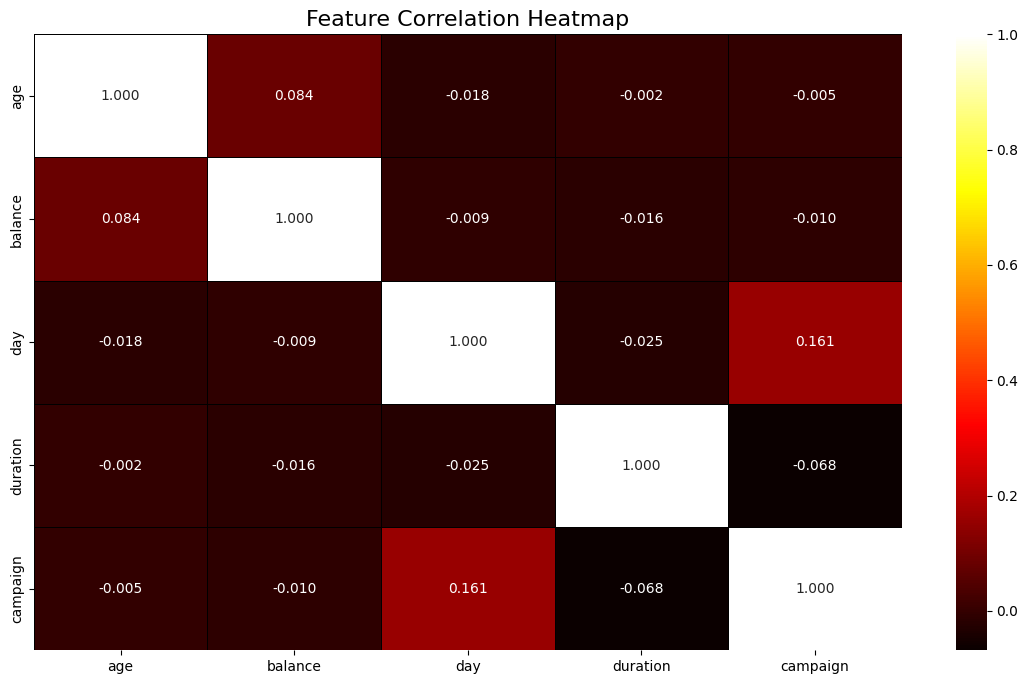

In [69]:
df_for_corr_matrix = df.copy()
df_for_corr_matrix['y'] = df_for_corr_matrix['y'].apply(lambda x: 1 if x == 'yes' else 0)

corr_matrix = df_for_corr_matrix[numeric_cols].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='hot', linewidths=0.5, linecolor='black', fmt=".3f")
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

Вывод:
Наблюдаем слабую корелляцию признаков

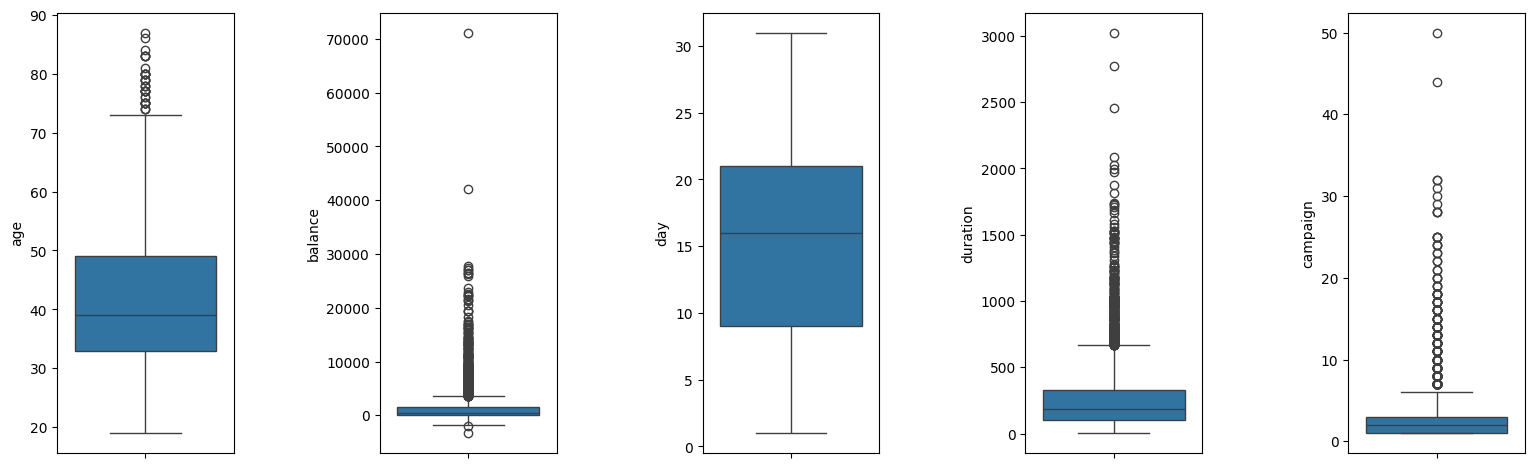

In [70]:
fig, axs = plt.subplots(1,5)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 5, forward=True)
for i,feature in enumerate(numeric_cols):
    sns.boxplot(data = df[feature], ax=axs[i])



/tmp/ipykernel_22654/901616398.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



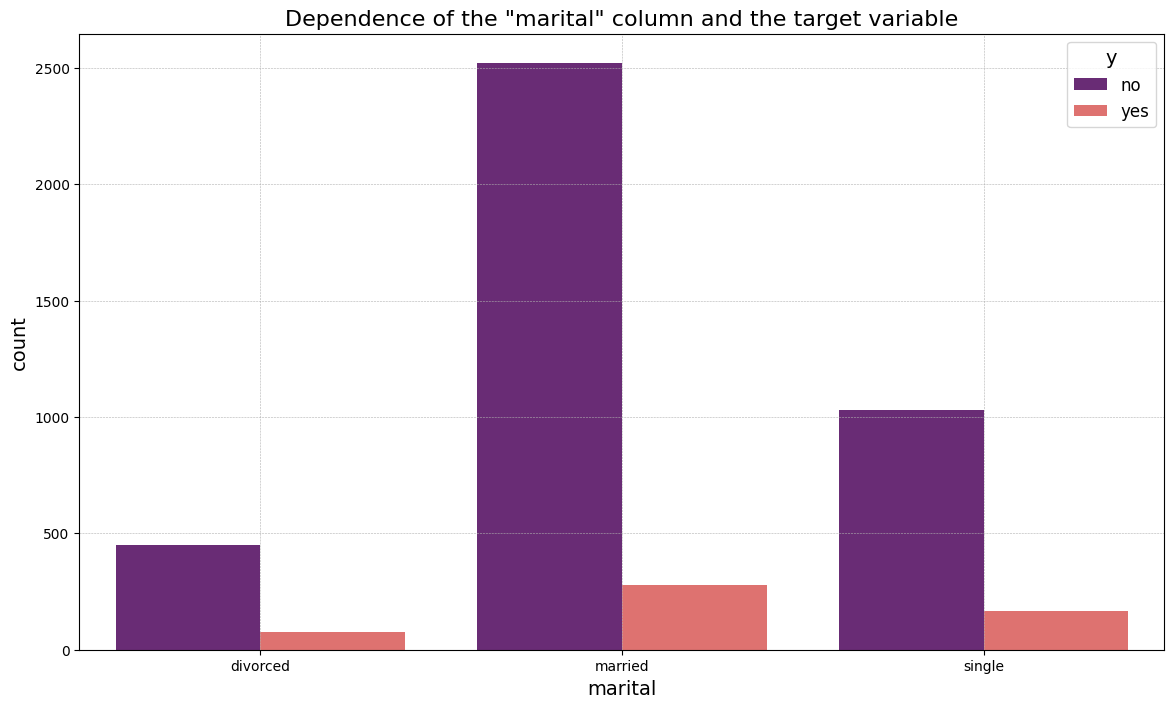

In [71]:
groupby_df = df.groupby(['marital', 'y'], as_index=False)['age'].count()
groupby_df.rename(columns={'age': 'count'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='marital', y='count', hue='y', data=groupby_df, palette="magma")

plt.xlabel('marital', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Dependence of the "marital" column and the target variable', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.4)

legend = plt.legend(title='y', fontsize=12, title_fontsize=14)
legend.get_title().set_fontsize('14')

plt.show()

In [72]:
df_for_groupby = df.groupby(['y','housing', 'loan'], as_index=False)['age'].count()
df_for_groupby.rename(columns={'age':'count'}, inplace=True)

/tmp/ipykernel_22654/1708879055.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



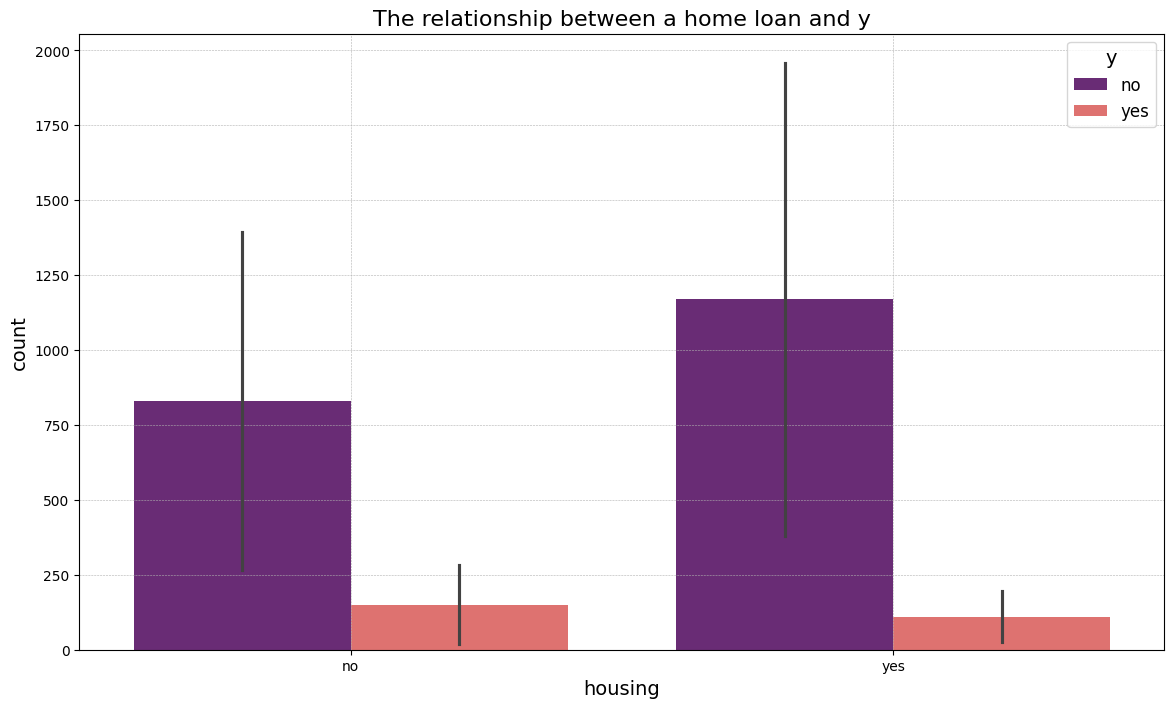

In [73]:
plt.figure(figsize=(14, 8))
sns.barplot(x='housing', y='count', hue='y', data=df_for_groupby, palette="magma")

plt.xlabel('housing', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('The relationship between a home loan and y', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.4)

legend = plt.legend(title='y', fontsize=12, title_fontsize=14)
legend.get_title().set_fontsize('14')

plt.show()

In [74]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook()


Loading BokehJS ...

In [82]:
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='age', y='balance')
hover = HoverTool(tooltips=[('loan ', '@loan'),
                              ('marital', '@marital'),
                              ('balance', '@balance')])

p.add_tools(hover)
show(p)

Save clean dataset

In [75]:
df.to_pickle('../data/clean_data.pkl')